## 1. Import needed libraries

In [16]:
# configuring local imports
import sys
sys.path.insert(1, '/home/maycon/Documents/LAB/lab_data_analysis/helpers')

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import masked_seqs_stats
from Bio import SeqIO
%matplotlib inline

## 2. Load the vector-masked EST sequences and calculate stats

In [18]:
path_to_seqs = '/home/maycon/Documents/LAB/eusociality/local_data/crossmatch_filtered'

xgroups_data = pd.DataFrame(columns=["seq_id", "taxon", "seq_len", "seq_xgroup_count", "xgroup_len", "dist_from_3", "dist_from_5", "seq_class"])

for seq_file in os.listdir(path_to_seqs):
    if seq_file.endswith('.screen'):
        taxon_name = seq_file.split('.')[0].split('_ests')[0]
        file_path = os.path.join(path_to_seqs, seq_file)
    
        for seq in SeqIO.parse(file_path, 'fasta'):
            if 'X' in seq.seq:
                current_seqlist = masked_seqs_stats.find_x_regions_and_calculate_stats(seq, taxon_name)

                if len(current_seqlist) > 0:
                    for seq_dict in current_seqlist:
                        xgroups_data = xgroups_data.append(seq_dict, ignore_index=True)
        
        nums_list = ['seq_len', 'seq_xgroup_count', 'xgroup_len', 'dist_from_3', 'dist_from_5']
        
        for col in nums_list:
            xgroups_data[col] = pd.to_numeric(xgroups_data[col], downcast='integer', errors='coerce')

In [19]:
xgroups_data

,seq_id,taxon,seq_len,seq_xgroup_count,xgroup_len,dist_from_3,dist_from_5,seq_class
0,DT319107.1,Polistes_canadensis,236,1,56,4,176,5
1,DT319140.1,Polistes_canadensis,395,1,44,0,351,7
2,DT319145.1,Polistes_canadensis,235,1,194,15,26,3
3,DB735471.1,Apis_mellifera,497,1,110,384,3,3
4,DB777386.1,Apis_mellifera,487,1,199,0,288,5
...,...,...,...,...,...,...,...,...
564,EE149448.1,Solenopsis_invicta,379,1,81,298,0,3
565,EE148907.1,Solenopsis_invicta,351,1,37,0,314,7
566,EE148927.1,Solenopsis_invicta,372,1,103,0,269,5
567,EE148957.1,Solenopsis_invicta,334,1,37,0,297,5


In [20]:
xgroups_data.shape

(569, 8)

In [21]:
xgroups_data.dtypes

seq_id              object
taxon               object
seq_len              int16
seq_xgroup_count      int8
xgroup_len           int16
dist_from_3          int16
dist_from_5          int16
seq_class           object
dtype: object

In [22]:
xgroups_data.describe()

,seq_len,seq_xgroup_count,xgroup_len,dist_from_3,dist_from_5
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,490.042179,1.091388,156.010545,95.708260,238.323374
std,193.207703,0.306180,195.487284,166.647418,218.662944
min,53.000000,1.000000,32.000000,0.000000,0.000000
25%,362.000000,1.000000,53.000000,8.000000,12.000000
50%,484.000000,1.000000,72.000000,21.000000,251.000000
75%,607.000000,1.000000,123.000000,47.000000,383.000000
max,1419.000000,3.000000,873.000000,882.000000,1331.000000


## 3. Plotting the length of the xgroups

### 3.1. By the count of xgroups per taxon

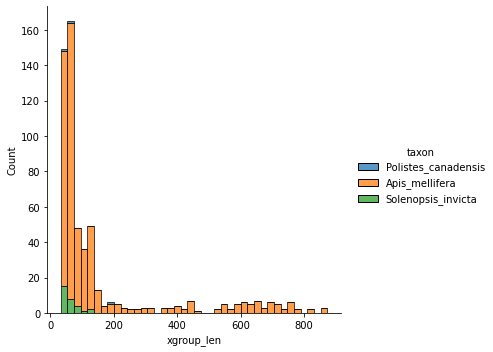

In [23]:
sns.displot(data=xgroups_data, x='xgroup_len', bins=40, hue='taxon', multiple='stack')

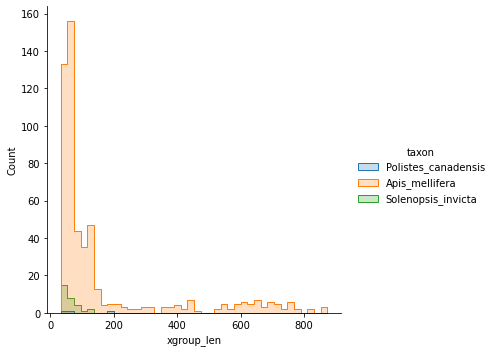

In [24]:
sns.displot(data=xgroups_data, x='xgroup_len', bins=40, hue='taxon', element='step')

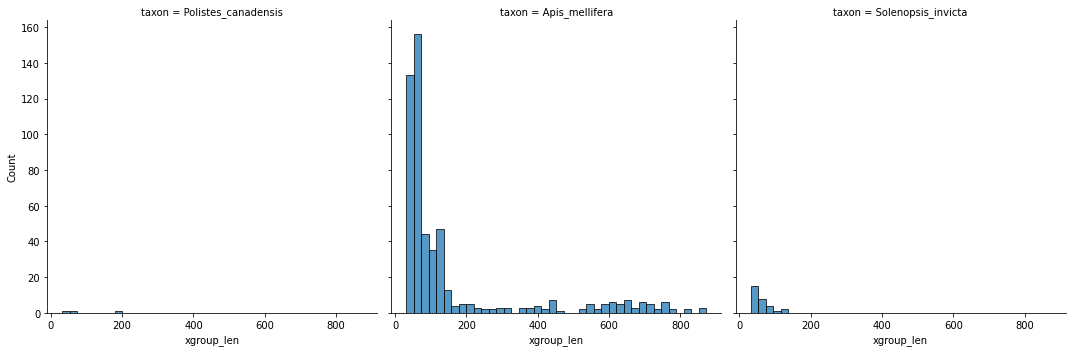

In [25]:
sns.displot(data=xgroups_data, x='xgroup_len', bins=40, col='taxon')

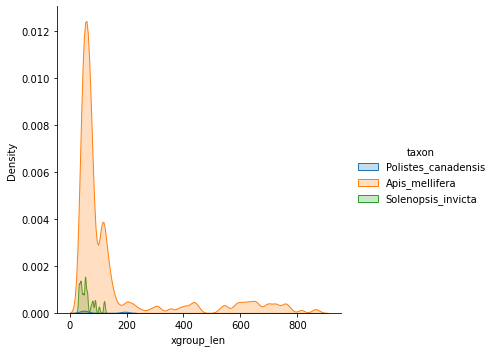

In [41]:
sns.displot(data=xgroups_data, x='xgroup_len', kind='kde', bw_adjust=.2, hue='taxon')

### 3.2. Normalizing by density

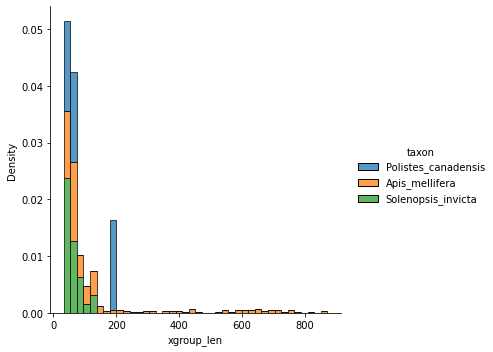

In [27]:
sns.displot(data=xgroups_data, x='xgroup_len', bins=40, hue='taxon', multiple='stack', stat='density', common_norm=False)